<a href="https://colab.research.google.com/github/iharshidas/Widhya_winternship/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 Analysis (Quantitative Modeling)**
### **By- Harshita Das**
Widhya Winternship Mission-3

In [34]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import math

In [3]:
# Reading the data
link= "https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv"
df=pd.read_csv(link)
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
# Dropping the "Sno" and "State/UnionTerritory" column. And grouping the dataframe by the "Date" column to fet daily case count
# Index is the Date column now
df.drop('Sno', axis=1, inplace=True)
df2=df.groupby(["Date"], sort=False).sum()
df2.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [5]:
# Resetting the index and adding an additional column "Total_cases" to the df2 dataframe
df3=df2.reset_index()
df2['Total_cases']=0
df3.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,0,0,0
1,31/01/20,1,0,0,0
2,01/02/20,2,0,0,0
3,02/02/20,3,0,0,0
4,03/02/20,3,0,0,0


In [41]:
# Summing the numerical columns for each row to get the total number of cases per day
for i in range(len(df3)):
  x=np.sum(df2.iloc[i])
  df3.loc[i,'Total_cases']=x
df3.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,30/01/20,1,0,0,0,1.0
1,31/01/20,1,0,0,0,1.0
2,01/02/20,2,0,0,0,2.0
3,02/02/20,3,0,0,0,3.0
4,03/02/20,3,0,0,0,3.0


In [8]:
# Data for 04/03/2020
df3[df3.Date=="04/03/20"]

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
34,04/03/20,12,16,3,0,31.0


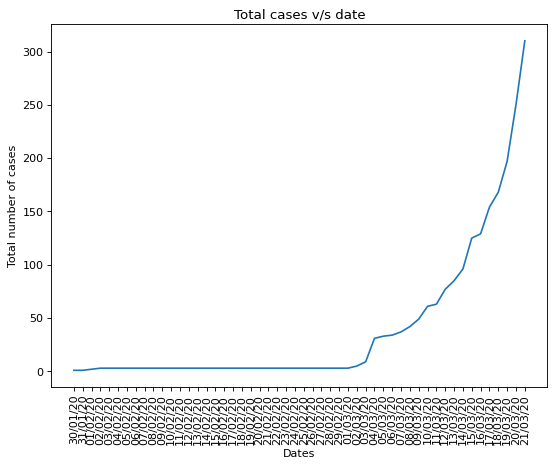

In [9]:
# Graph for tatal cases per day
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df3['Date'],df3['Total_cases'])
plt.xlabel("Dates")
plt.ylabel('Total number of cases')
plt.title('Total cases v/s date')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Setting the index back to "Date"
data_old = df3.set_index("Date")
data_old.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30/01/20,1,0,0,0,1.0
31/01/20,1,0,0,0,1.0
01/02/20,2,0,0,0,2.0
02/02/20,3,0,0,0,3.0
03/02/20,3,0,0,0,3.0


In [24]:
# Slicing the dataset from 04/03/2020 and onwards
data = data_old.loc["04/03/20":]
data.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
04/03/20,12,16,3,0,31.0
05/03/20,14,16,3,0,33.0
06/03/20,15,16,3,0,34.0
07/03/20,18,16,3,0,37.0
08/03/20,23,16,3,0,42.0


In [31]:
# Calculating rate of increase on each day
series=pd.Series(data['Total_cases'])
result=series.pct_change()
result

Date
04/03/20         NaN
05/03/20    0.064516
06/03/20    0.030303
07/03/20    0.088235
08/03/20    0.135135
09/03/20    0.166667
10/03/20    0.244898
11/03/20    0.032787
12/03/20    0.222222
13/03/20    0.103896
14/03/20    0.129412
15/03/20    0.302083
16/03/20    0.032000
17/03/20    0.193798
18/03/20    0.090909
19/03/20    0.172619
20/03/20    0.269036
21/03/20    0.240000
Name: Total_cases, dtype: float64

In [32]:
# Average rate of increase per day
r=result.sum()/result.count()
r

0.14814803793984233

In [39]:
# p_t = p_o * e^(r*t)
# p_t and p_o are the predicted forecast and initial values respectively
# t is the time period in days
# Predicting number of cases 26 days from the day when the total cases were 31 i.e 4th March
p_t=31*math.exp(r*26)
round(p_t)

1459